# **Module 2 - Introduction to Classification with Decision Trees**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/DHI/Intro_ML_course/blob/main/module_2/2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

Welcome to this module on classification! In this section, we embark on a focused and practical exploration of Decision Trees applied to the specific task of predicting whether a river's average discharge exceeds or falls below 5,000m3/s. Our predictive framework will be based on two parameters: the river's length and drainage area.

This exploration will extend beyond the basic understanding of Decision Trees, as we will delve into the intricacies of utilizing the bagging principle to develop Random Forest models. Additionally, we will deeply analyze model evaluation methodologies.

This journey will not only provide a solid understanding of Decision Trees and their application in classification but also offer valuable insights into model assessment, enabling us to tackle challenges such as overfitting and underfitting.

#### What is Classification?

**Classification** is a supervised machine learning task where the goal is to assign a category or label to a given input based on the available data. It's used for a wide range of applications, from spam email detection to medical diagnosis and much more.

#### Let's start by importing all the required functions from:
- usual data science libraries
- the excellent machine-learning library: scikit-learn

Scikit-learn's website contains many examples, code snippets and tutorials: https://scikit-learn.org/stable/

In [1]:
# Ordinary data science packages
import os.path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Scikit-learn functions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict

# DECISION TREES

## I - Load the data

The data is extracted from this Wikipedia page: [the list of rivers by discharge ](https://en.wikipedia.org/wiki/List_of_rivers_by_discharge). For this notebook, we decided to start with using only two features - the river length and its drainage area - to predict whether or not a river's average discharge exceeds $5000 m^3/s$ or not. Using only two features allows to simply visualize models through decision boundaries.  

In [2]:
# Load the dataset
data = pd.read_csv('https://github.com/DHI/Intro_ML_course/raw/main/module_2/Wikipedia_rivers.csv')

# Rename features
data['Length (km)'] = data['length_km']
data['Drainage area(km2)'] = data['drainage_area']
data['Discharge (m3/s)'] = data['average_discharge ']
data[f'Discharge over 5000 m3/s'] = data['average_discharge '] > 5000

# Define features and target variable
X = data[['Length (km)', 'Drainage area(km2)']]
y = data[f'Discharge over 5000 m3/s']
X.head(5)

,Length (km),Drainage area(km2)
0,6400,6112000
1,4370,4014500
2,2704,1731334
3,2250,989000
4,2230,691000


In [3]:
y.head(5)

0    True
1    True
2    True
3    True
4    True
Name: Discharge over 5000 m3/s, dtype: bool

Split the data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.4, random_state=42)

**Note**: The `train_test_split` function typically divides the data randomly into two sets, one for training the model and the other for testing its performance. To ensure the reproducibility of the same train-test split across different runs or by other individuals, we utilize the `random_state` variable. This variable acts as a seed to the random number generator, which in turn controls the randomness involved in the data splitting process. By setting a specific value for random_state, we essentially fix the randomness in the data splitting process, leading to the same train-test split every time the code is run with that particular seed.

In [5]:
X_train.head(5)

,Length (km),Drainage area(km2)
28,2400,437000
95,6853,3400000
122,120,127700
94,735,133000
53,1090,81675


#### **Exercise 1**

*Plot the drainage area against the river length, with different colors depending on the value of the label (`Discharge over 5000 m3/s`)*



## II - Training a decision tree

A **Decision Tree** is a versatile and interpretable model that can be used for both classification and regression tasks. It's called a "tree" because it resembles an inverted tree with branches (decisions) and leaves (outcomes).

The decision tree is constructed through a series of binary decisions, leading to a final classification or value. This process makes it a highly interpretable model, which is beneficial for understanding the reasoning behind predictions.

#### Anatomy of a Decision Tree

- **Root Node**: The top node in the tree, representing the first decision.

- **Internal Node**: The nodes between the root and leaves, each corresponding to a decision.

- **Leaf Node**: The final nodes where a classification (or regression) outcome is assigned.

- **Splitting Criteria**: The conditions used at each node to decide how to proceed down the tree.

### Classification with Decision Trees

In classification, Decision Trees use a set of features to determine the class of the input.
Decision Trees partition the data at each internal node by selecting the feature and the threshold value that best separates the classes.

Each leaf node is assigned to a class. During classification, an input traverses the tree by following the decisions until it reaches a leaf, which assigns the final class label.

### Advantages of Decision Trees

- **Interpretability**: Decision Trees are easy to visualize and understand. You can trace the path from root to leaf to see how decisions are made.

- **Little pre-processing**: Scaling or centering features is not required to train a decision tree.

- **Nonlinear Relationships**: They can capture nonlinear relationships between features and outcomes.

- **Feature Importance**: Decision Trees provide a measure of feature importance, helping you identify the most influential features.

- **Versatile**: Decision Trees can handle both classification and regression problems.

Let us set the maximum depth of the decision tree. This parameters which are fixed before the training of the model are called **hyperparameters**.

In [6]:
max_depth = 5

We will now see how easy it is to define and train a machine learning model:

In [7]:
tree_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

In [8]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Done! We now have a trained decision tree. Let's visualize it.

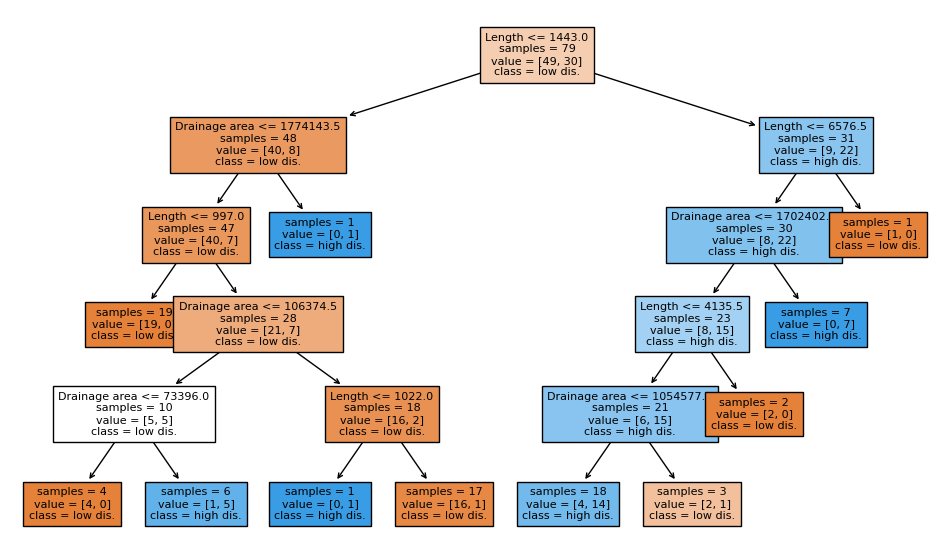

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))
_ = plot_tree(tree_classifier,
              feature_names=['Length', 'Drainage area'],
              class_names=[f'low dis.', f'high dis.'],
              impurity=False,
              filled=True,
              fontsize=8, ax=ax)

#### **Exercise 2**

*Try other hyperparameters for the decision tree (`max_depth`, `min_samples_split` and `min_samples_leaf`), how does it affect the shape of the tree? What happens if you do not use any hyperparameter: `tree_classifier = DecisionTreeClassifier()`?*

--> [scikit-learn documentation on decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Now, we can readily generate predictions for the test set. Let's test this by making predictions on the initial 5 elements of the test dataset and
calculating the accuracy score for these 5 predictions.

In [10]:
X_test.head(5)

,Length (km),Drainage area(km2)
51,3180,1081718
69,1805,507000
31,3531,1380000
42,2860,801463
117,620,31650


In [11]:
tree_predictions = tree_classifier.predict(X_test[0:5])
tree_predictions

array([False,  True, False,  True, False])

In [12]:
y_test[0:5]

51      True
69     False
31      True
42      True
117    False
Name: Discharge over 5000 m3/s, dtype: bool

In [13]:
np.mean(tree_predictions == y_test[0:5])

0.4

In [14]:
accuracy_score(tree_predictions, y_test[0:5])

0.4

## III. Visualize the decision boundaries

In [15]:
def plot_decision_boundary(clf, X, y, axes, score=False, legend=False, display_names=False):

    # Create a mesh grid to plot decision boundaries
    x_min, x_max, y_min, y_max = axes
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

    # Predict on the mesh grid
    if score:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')
    plt.plot(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], "ro", label="Lower discharge")
    plt.plot(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], "g^", label="Higher discharge")
    plt.xlabel("Length ($km$)", fontsize=14)
    plt.ylabel("Drainage area ($km^2$)", fontsize=14)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

The following figure displays the training dataset as well as the decision boundaries of the trained decision tree

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


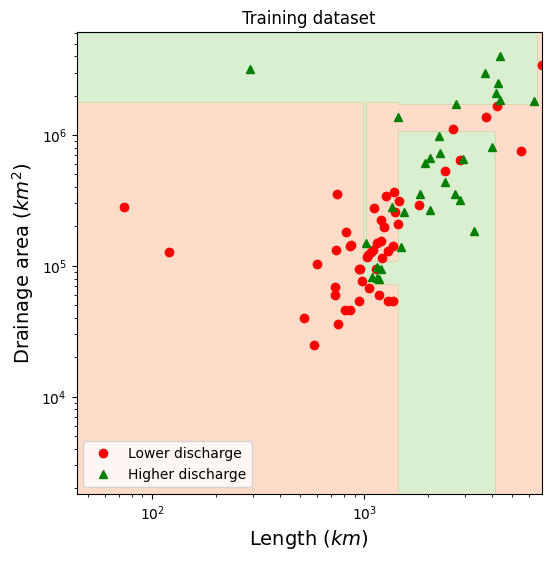

In [16]:
fig = plt.figure(figsize=(6, 6))
plot_decision_boundary(tree_classifier, X_train, y_train,
                       axes=[np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0]), np.min(X.iloc[:, 1]), np.max(X.iloc[:, 1])])
plt.xscale('log')
plt.yscale('log')
plt.title('Training dataset')
plt.legend()

Let's look at the score on the training dataset

In [17]:
train_predictions = tree_classifier.predict(X_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print('Accuracy on the training dataset', train_accuracy)

Accuracy on the training dataset 0.9113924050632911


We should plot the test dataset to see how does the model generalizes to instances outside of the training dataset:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


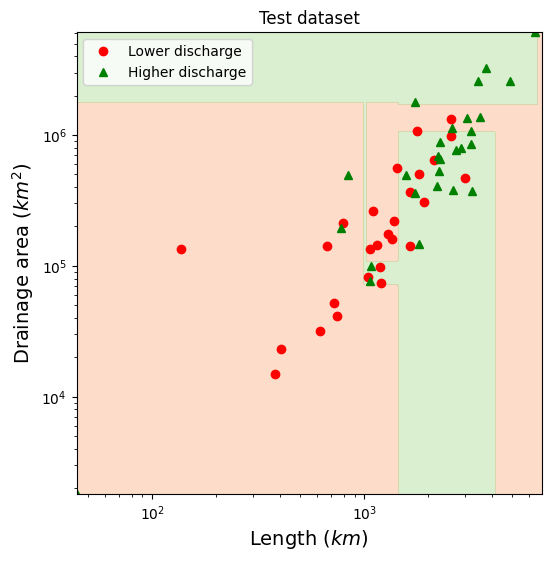

In [18]:
plt.figure(figsize=(6, 6))
plot_decision_boundary(tree_classifier, X_test, y_test,
                       axes=[np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0]), np.min(X.iloc[:, 1]), np.max(X.iloc[:, 1])])
plt.xscale('log')
plt.yscale('log')
plt.title('Test dataset')
plt.legend()

In [19]:
test_predictions = tree_classifier.predict(X_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print('Accuracy on the test dataset', test_accuracy)

Accuracy on the test dataset 0.6851851851851852


#### **Exercise 3**

*Is there a big difference between the performance in the training dataset and the test dataset? Why? Try with other hyperparameters (`max_depth=10`, `max_depth=1`, etc.), how does this affect the performance on both datasets?*

## IV - Dependence of the performance on hyperparameters and on the number of training points.

How does accuracy on both the training and the test dataset depend on the `max_depth` of the decision tree?

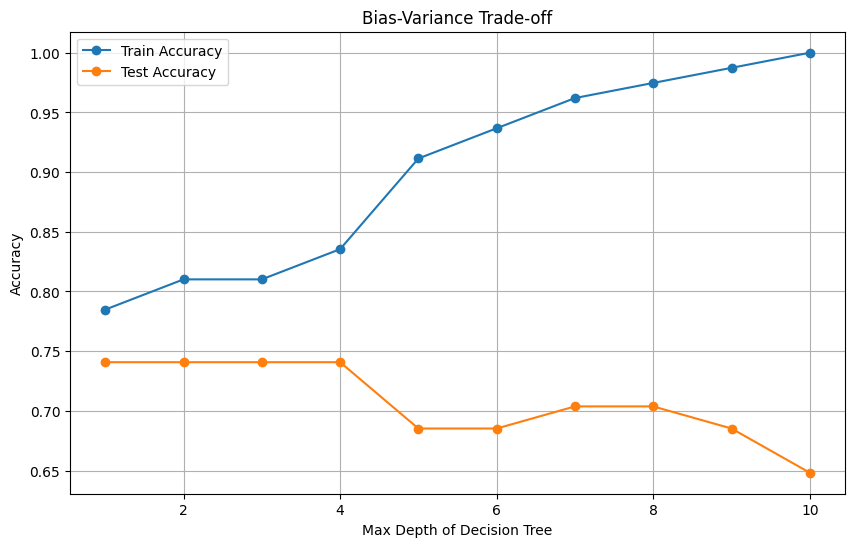

In [20]:
# Define a range of max_depth values to loop over
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize lists to store accuracy scores
train_scores = []
test_scores = []

# Loop over max_depth values
for max_depth in max_depth_values:
    # Create and fit the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions on training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to the lists
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plot the bias-variance trade-off
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()

#### **Exercise 4**

*You can replicate the following figure but this time, instead of changing `max_depth`, loop over multiple values of `min_samples_split`. For what value of both parameters does the model start to overfit?*

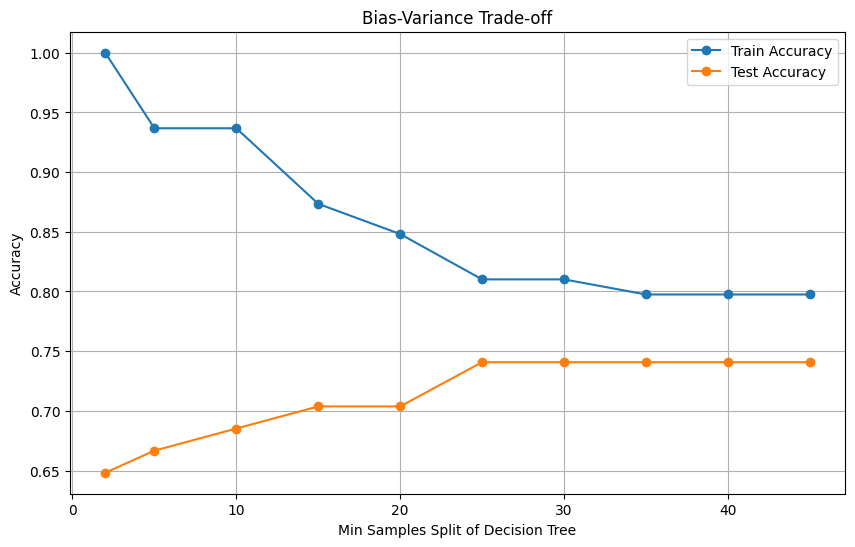

In [21]:
# Define a range of min_samples_split values to loop over
min_samples_split_values = [2, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# Initialize lists to store accuracy scores
train_scores = []
test_scores = []

# Loop over min_samples_split values
for min_samples_split in min_samples_split_values:
    # Create and fit the decision tree classifier
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions on training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculate accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to the lists
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plot the bias-variance trade-off
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(min_samples_split_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Min Samples Split of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()


## V - Dependence of scores on the size of the training dataset

Similarly to the hyperparameters of the model, the amount of data used for training have an important impact on the performance, let us train decision trees with identical hyperparamaters but with an increasing number of training points.

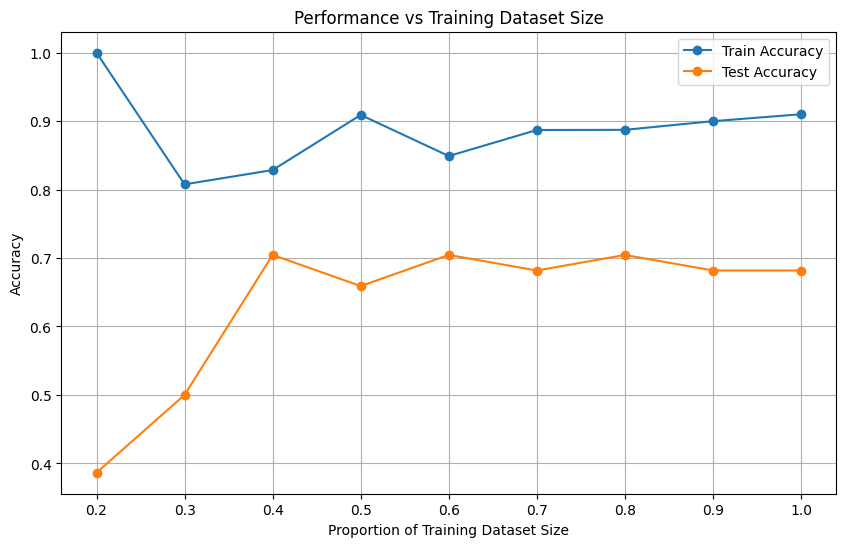

In [22]:
max_depth = 5

# Initializing lists for accuracy scores
train_scores = []
test_scores = []

# Splitting the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.33,
                                                              random_state=42)

# Defining a range of training dataset sizes to iterate over
train_sizes = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Iterating over training dataset sizes
for train_size in train_sizes:

    number_training_instances = int(train_size*len(X_train_full))

    # Use only a subset of the training dataset for training
    X_train = X_train_full[:number_training_instances]
    y_train = y_train_full[:number_training_instances]

    # Creating and fitting the decision tree classifier with the defined max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predicting on training and testing data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calculating accuracy scores for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Appending accuracy scores to the respective lists
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the bias-variance trade-off based on the size of the training dataset
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Train Accuracy', marker='o')
plt.plot(train_sizes, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Proportion of Training Dataset Size')
plt.ylabel('Accuracy')
plt.title('Performance vs Training Dataset Size')
plt.legend()
plt.grid(True)


#### **Exercise 5**

*Does this behave as you would expect, does the performance saturate and how do hyperparameters affect these curves?*

# RANDOM FORESTS

In the previous section, we explored Decision Trees as a simple yet interpretable model for classification. Decision Trees have their strengths, but they are prone to overfitting, which can lead to poor generalization. Random Forests, a powerful ensemble learning method, can help mitigate this issue while improving predictive accuracy.

## What Are Random Forests?

Random Forests are an ensemble method that combines multiple Decision Trees to create a more robust and accurate model. They are particularly effective for classification tasks.

### The Idea Behind Random Forests

The core idea behind Random Forests is **bagging** (Bootstrap Aggregating) and **feature randomization**:

1. **Bagging**: Random Forests build multiple Decision Trees, each trained on a random subset of the training data. This random sampling reduces the risk of overfitting.

2. **Feature Randomization**: For each split in the Decision Trees, only a random subset of features is considered. This introduces diversity among the trees, improving the model's ability to generalize.

**Note**: *For this example, feature randomization is not relevant as we only use two features.*

### Combining Multiple Decision Trees

Random Forests aggregate the predictions of multiple Decision Trees to make a final classification decision:

- For classification tasks, it employs a **majority vote** mechanism. The class most frequently predicted by the individual trees becomes the predicted class.

- For regression tasks, it averages the predictions made by individual trees.

## Advantages of Random Forests

Random Forests offer several advantages:

1. **Improved Generalization**: By combining the results of multiple Decision Trees, overfitting is reduced.

2. **High Accuracy**: Random Forests can provide high accuracy, making them suitable for complex classification tasks.

3. **Feature Importance**: They can help identify the most important features in the dataset.

4. **Robustness**: Random Forests are robust to outliers and noise in the data.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.4, random_state=42)

## I. Hard-coding of bagging

We define 100 decision trees and train each one of them on 20 randomly chosen instances in the training dataset.

In [24]:
n_trees = 100
n_instances = 20
forest = [DecisionTreeClassifier() for _ in range(n_trees)]

We will use the choice function from numpy to randomly select training instances.

**Note**: `replace=True` means that each training instance can be chosen multiple times. A random sample *with replacement* is called a bootstrap sample and Bagging stands for "Boostrap aggregating"

In [25]:
idx = np.random.choice(X_train.index, size=n_instances, replace=True)
idx

array([  1,  54,  61,  13, 129,  13,  13,  13, 116,  14,  21, 116,  74,
       126, 106, 111,  70,   5,  61,  71])

In [26]:
# Create the in-bag dataset
X_in_bag, y_in_bag = X_train.loc[idx], y_train.loc[idx]
X_in_bag.head(3)

,Length (km),Drainage area(km2)
1,4370,4014500
54,2273,729000
61,1207,114000


Let us now train each `tree` in `forest` on a different set of instances.

In [27]:
test_scores = []
oob_scores = []

for tree in forest:
  idx = np.random.choice(X_train.index, size=n_instances, replace=True)
  X_in_bag, y_in_bag = X_train.loc[idx], y_train.loc[idx]
  tree.fit(X_in_bag, y_in_bag)

  # let us compute the performance on the test dataset
  test_score = accuracy_score(tree.predict(X_test), y_test)
  test_scores.append(test_score)

  # remark - many instances on the training dataset are not used for training
  # we can compute the accuracy scores on those
  X_out_of_bag, y_out_of_bag = X_train.drop(idx), y_train.drop(idx)
  out_of_bag_score = accuracy_score(tree.predict(X_out_of_bag), y_out_of_bag)
  oob_scores.append(out_of_bag_score)

Text(0, 0.5, 'Frequency')

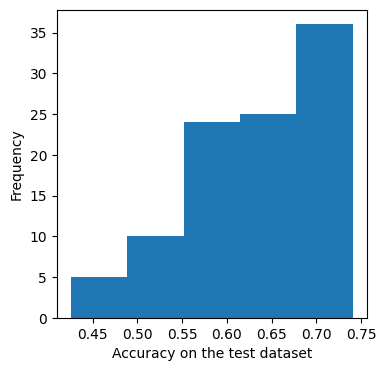

In [28]:
plt.figure(figsize=(4,4))
plt.hist(test_scores, bins=5)
plt.xlabel('Accuracy on the test dataset')
plt.ylabel('Frequency')

In [29]:
print('Average score of individual decision trees', np.mean(test_scores))

Average score of individual decision trees 0.6342592592592591


#### **Exercise 6**

*Display the out of bag scores*

You should obtain a similar result. The out-of-bag instances allow to check how the model generalizes to new instances, and allows to have any test data which is very useful for small datasets (see more about out-of-bag scores below).

In [30]:
print('Average score of individual decision trees', np.mean(oob_scores))

Average score of individual decision trees 0.6244486361556362


**Now comes the magic of random forests**. For each test set instance, generate the predictions of the 100 Decision Trees, and keep only the most frequent prediction. This gives you _majority-vote predictions_ over the test set.

In [31]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [32]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

Evaluate these predictions on the test set: you should obtain a higher accuracy than individual decision trees.

Congratulations, you have trained a Random Forest classifier!

In [33]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.7777777777777778

#### **Exercise 7**

*How does this compare to the best decision you have trained in the previous section? Try to include some hyperparameters to the decision trees instead of the uncronstrained* `forest = [DecisionTreeClassifier() for _ in range(n_trees)]`

## II. Using sklearn's Bagging and RandomForest

Instead of create the previous loop over the trees, you can use `scikit-learn`'s `RandomForestClassifier` or `BaggingClassifier`. Here's how:

In [34]:
# Option 1
rf_clf = RandomForestClassifier(n_estimators=100,
                                max_samples=20,
                                max_features=2)


```
# Option 2
rf_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                              max_samples=20,
                              n_estimators=100)
```

In [35]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, max_samples=20)

We can plot the decision boundary of this random forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


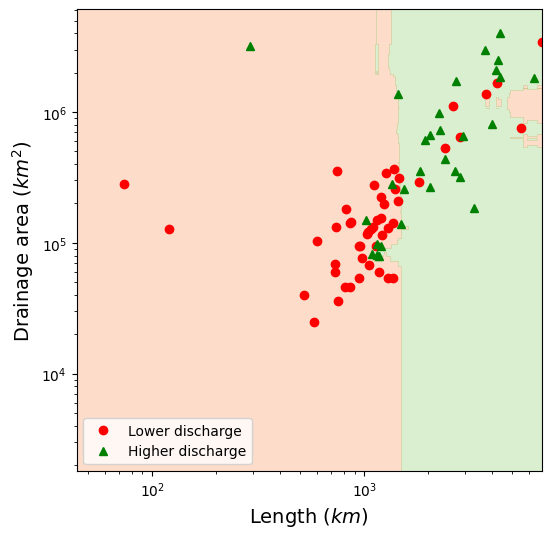

In [36]:
plt.figure(figsize=(6, 6))
plot_decision_boundary(rf_clf, X_train, y_train,
                       axes=[np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0]), np.min(X.iloc[:, 1]), np.max(X.iloc[:, 1])])
plt.xscale('log')
plt.yscale('log')
plt.legend()

Random forests result from a vote, instead of the majority vote, we can display the number of trees which voted for "high discharge", these are referred to as **class probabilities**.

In [37]:
# Predicitons
rf_clf.predict(X_test[:5])

array([ True,  True,  True,  True, False])

In [38]:
# Predicitons probabilities
rf_clf.predict_proba(X_test[:5])[:, 1]

array([0.57, 0.66, 0.61, 0.64, 0.06])

Here is how those probabilities look against the training set:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


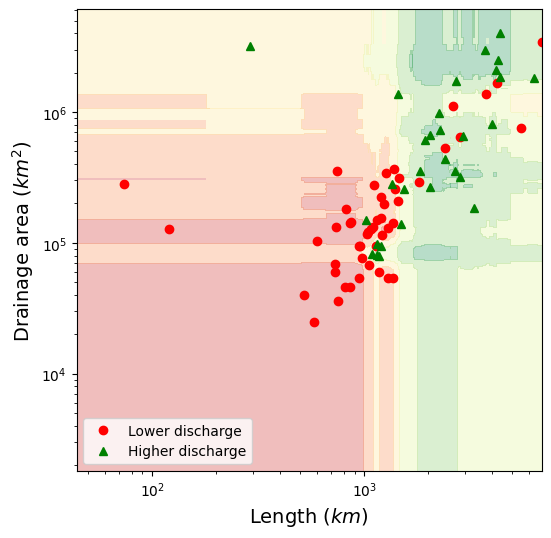

In [39]:
plt.figure(figsize=(6, 6))
plot_decision_boundary(rf_clf, X_train, y_train, score=True,
                       axes=[np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0]), np.min(X.iloc[:, 1]), np.max(X.iloc[:, 1])])
plt.xscale('log')
plt.yscale('log')
plt.legend()

## III - Out-of-bag score

A standout feature of Random Forest is its ability to estimate model performance without requiring a separate test dataset, thanks to the Out-of-Bag (OOB) score.

#### **Understanding the OOB Score**

The OOB score evaluates the Random Forest model during training in the following way:

- Each decision tree in the Random Forest is trained on a subsample of the original dataset, allowing some data points to be excluded and others to be duplicated in the training set of each tree.

- The OOB score is computed by assessing each data point using the decision trees that didn't include it during training, or were "out of bag."

- The OOB score aggregates the predictions from these out-of-bag trees, it assigns the most common class among the out-of-bag predictions to the data point.

It serves as a valuable metric for evaluating model performance, particularly when working with limited data or aiming to assess the model's capabilities without setting aside a separate validation dataset.

In [40]:
oob_scores = []
forest = RandomForestClassifier(max_samples=20, oob_score=True, random_state=0)

for n_estimators in range(1, 50, 4):
    forest.set_params(n_estimators=n_estimators)
    forest.fit(X, y)  # Fit the model to the full dataset this time
    oob_scores.append(forest.oob_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


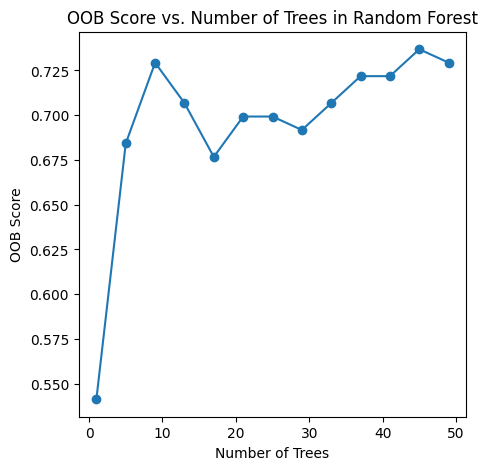

In [41]:
# Plotting the OOB score vs the number of trees
plt.figure(figsize=(5, 5))
plt.plot(range(1, 50, 4), oob_scores, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.title('OOB Score vs. Number of Trees in Random Forest')
plt.show()

The OOB score is supposed to generally increase as the number of trees increases, but you will probably see some variability in the values.

## IV - Finding the best hyperpareters using GridSearchCV

With parameters such as `max_depth`, `max_samples`, `n_estimators`, and others, the Random Forest algorithm can have a wide range of potential hyperparameter combinations. The `GridSearchCV` method efficiently explores this hyperparameter space to find the best combination. The `CV` in `GridSearchCV` stands for cross-validation:

Cross-validation involves partitioning the dataset into multiple subsets, performing model training and evaluation iteratively, ensuring that every data point is part of the validation set at least once. This process helps in assessing the model's performance more accurately and robustly.

`GridSearchCV` simplifies the complex task of selecting the best set of hyperparameters by automatically performing cross-validation for each combination. It computes the model's performance metrics for different splits of the data, allowing practitioners to identify the hyperparameter configuration that yields the best performance across the dataset.

For more information about cross-validation, the following scikit-learn tutorial is a great resource: https://scikit-learn.org/stable/modules/cross_validation.html


In [42]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [None, 3, 4, 5],
    'max_samples': [None, 10, 20, 30, 50]
}

# Create a Random Forests classifier
tree_classifier = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=3)

# Perform the grid search on the training data
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 4, 5],
                         'max_samples': [None, 10, 20, 30, 50],
                         'n_estimators': [10, 20]},
             scoring='accuracy')

We can plot the results of this GridSearch as a heatmap.

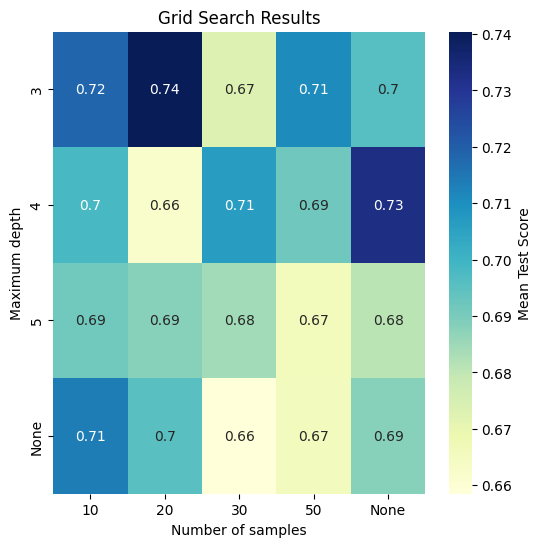

In [43]:
# Convert the results of the grid search into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Extract the hyperparameters and the mean test scores
params = results[['param_n_estimators', 'param_max_depth', 'param_max_samples']]
params = params.astype(str)
params['mean_test_score'] = results['mean_test_score']

# Create a pivot table for the heatmap
heatmap_data = params.pivot_table(index='param_max_depth', columns='param_max_samples', values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Results')
plt.xlabel('Number of samples')
plt.ylabel('Maximum depth')
plt.show()

Let's select the best result only.

In [44]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [45]:
best_params

{'max_depth': 3, 'max_samples': 20, 'n_estimators': 20}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


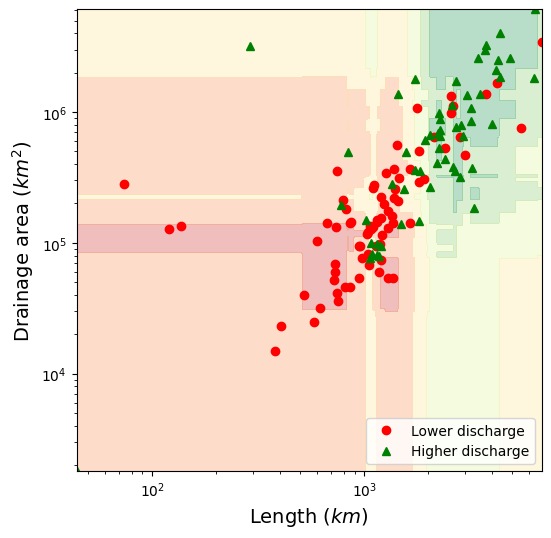

In [46]:
plt.figure(figsize=(6, 6))
plot_decision_boundary(best_model, X, y, score=True,
                       axes=[np.min(X.iloc[:, 0]), np.max(X.iloc[:, 0]), np.min(X.iloc[:, 1]), np.max(X.iloc[:, 1])])
plt.xscale('log')
plt.yscale('log')
plt.legend()

Until now, we have tried to maximize the test (or cross-validation) accuracy, yet the accuracy score is often not the best metric to optimize. Recall, precision, f1-score and ROC-AUC are important metrics to consider...

# CONFUSION MATRICES

In classification tasks, it's essential to understand how well a model is performing. And the `accuracy_score` which we used until now is often not the best metric to determine the performance.

Consider the example of a rare medical condition that only affects a small percentage of the population. If a classifier simply predicts that all patients are healthy, it can achieve a high accuracy score, as it correctly classifies the majority class (healthy individuals). However, this approach completely fails to identify the presence of the rare disease for the few patients which do carry it.

#### **Confusion Matrix**

A **Confusion Matrix** is a table that allows us to understand the performance of a classification model. It summarizes the model's predictions against actual outcomes. The confusion matrix consists of four components:

- **True Positives (TP)**: The number of correct positive predictions.
- **True Negatives (TN)**: The number of correct negative predictions.
- **False Positives (FP)**: The number of incorrect positive predictions (Type I error).
- **False Negatives (FN)**: The number of incorrect negative predictions (Type II error).

Thanks to sklearn library, we can split the data, define and train a random forest and predict classes and probabilities, all in 4 lines of code:

## I- Display the confusion matrix

In [47]:
clf = RandomForestClassifier(max_depth=2,
                             max_samples=30,
                             n_estimators=10,
                             random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]

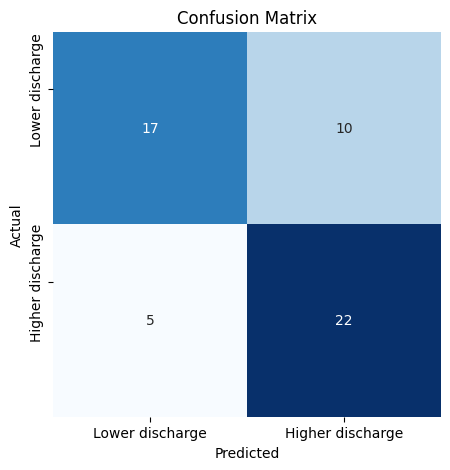

In [48]:
fig = plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], [f'Lower discharge', f'Higher discharge'])
plt.yticks([0.3, 1.3], [f'Lower discharge', f'Higher discharge'])
plt.show()

## II. Deduce recall and precision


Using the confusion matrix, we can calculate various metrics to assess model performance:

#### **Recall**

**Recall** also known as Sensitivity or True Positive Rate, is a metric that answers the question: "Of all the actual high discharge rivers, how many did the model identify?" It is calculated as:

`Recall = TP / (TP + FN)`

High recall indicates that the model is good at capturing positive cases, minimizing false negatives.

#### **Precision**

**Precision** answers the question: "Of all the predicted high discharge rivers, how many actually had high discharge?" It measures the accuracy of positive predictions and is calculated as:

`Precision = TP / (TP + FP)`

High precision indicates that the model's positive predictions are reliable and have a low rate of false positives.

#### **F1-Score**

**F1-score** is a harmonic mean of precision and recall and provides a balanced assessment of the model's performance, especially when dealing with imbalanced datasets. It considers both false positives and false negatives, making it a useful metric for evaluating models in situations where we want to car equally about recall and precision. F1-score is calculated as:

`F1-score = 2 * (Precision * Recall) / (Precision + Recall)`

A high F1-score indicates that the model has both good precision and recall, implying that it has a balance between minimizing false positives and false negatives.

In [49]:
# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate f1-score
f1 = f1_score(y_test, y_pred)
print(f"f1-score: {f1:.2f}")

Recall: 0.81
Precision: 0.69
f1-score: 0.75


**Exercise 9**

*Deduce the recall and precision from the decision matrix. It should match the previous numbers.*

## III. Change the discrimination threshold

By default, we predict a river as "high discharge" if the probability is higher than 0.5. But we might want to define another threshold.

In the example of the medical diagnosis, we might want to conduct additional tests if the probability of someone having a malignant disease is higher than, say, 10% as we prefer to have false positive than false negatives.

In [50]:
y_pred == (y_probs > 0.5)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

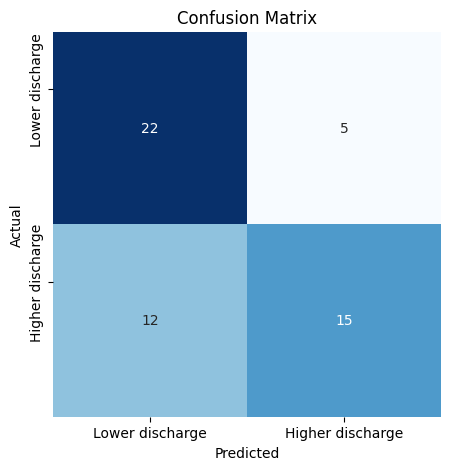

In [51]:
fig = plt.figure(figsize=(5, 5))
conf_matrix = confusion_matrix(y_test, y_probs>0.7)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], [f'Lower discharge', f'Higher discharge'])
plt.yticks([0.3, 1.3], [f'Lower discharge', f'Higher discharge'])
plt.show()

**Exercise 10**

*By setting the discrimination threshold to 0.7 (or 0.3), how are recall, precision and f1-score affected?*

## IV - ROC curve

#### **Receiver Operating Characteristic (ROC) Curve**

The **ROC Curve** is a graphical representation of a model's performance as the discrimination threshold is varied. It plots the True Positive Rate (Recall) against the False Positive Rate (FPR). Each point on the ROC curve represents a trade-off between recall and precision.

**False Positive Rate (FPR)**: FPR measures the rate of incorrectly predicted positive cases among all the actual negative cases. It is calculated as:

$FPR = \frac{FP}{FP + TN}$

A low FPR indicates that the model makes fewer false positive errors.

#### **Area Under the ROC Curve (AUC-ROC)**

The **Area Under the ROC Curve (AUC-ROC)** is a single value that summarizes the ROC curve's performance. A higher AUC-ROC indicates a better-performing model. If the AUC-ROC is 0.5, it suggests that the model's performance is equivalent to random guessing, while an AUC-ROC of 1.0 means perfect discrimination. AUC-ROC is generally a good metric to compare different models as it provides a single-value assessment of a model's ability to discriminate between positive and negative classes across all possible classification thresholds.

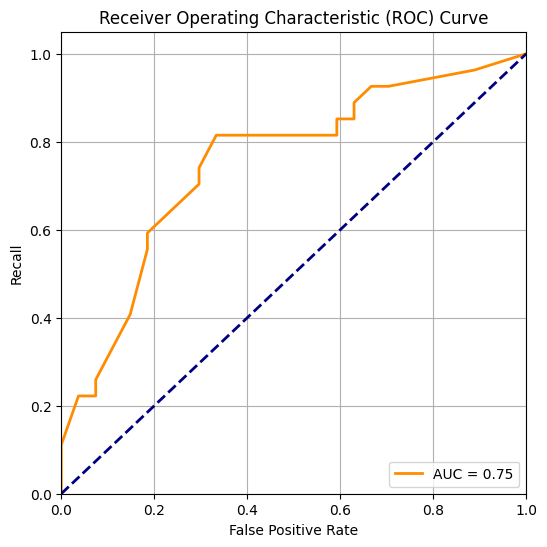

In [52]:
# Calculate ROC curve
fpr, recall, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC-ROC
roc_auc = auc(fpr, recall)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, recall, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Excercise 11**

*What should be the ROC curve of a random model which predictions are completely arbitrary?*

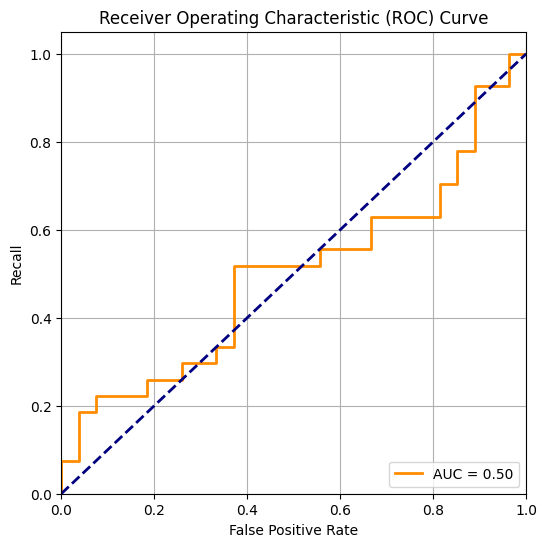

In [53]:
# Random predictions
y_probs_random = np.random.rand(len(y_test))

# Calculate ROC curve
fpr, recall, thresholds = roc_curve(y_test, y_probs_random)

# Calculate AUC-ROC
roc_auc = auc(fpr, recall)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, recall, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

If you try to run the previous code (with the random predictions) multiple times, you will see that the performance varies significantly. This high variability is linked to the small size of the dataset.

# FEATURE IMPORTANCE

Random Forest models provide a feature importance metric, which quantifies the relevance of each feature in the model's predictive performance. By analyzing the feature importance, we can identify the most influential features driving the model's decisions, gaining valuable insights into the underlying data relationships.

The feature importance score is computed based on the decrease in node impurity achieved by each feature when building the Random Forest. Features with higher importance values have a more substantial impact on the model's predictions, aiding in feature selection and enhancing the interpretability of the model's decision-making process.

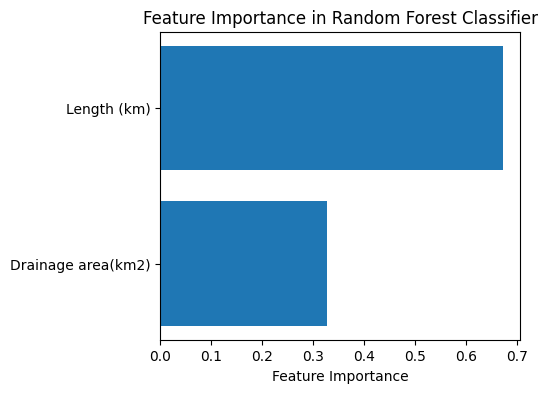

In [54]:
# Calculate and visualize feature importances
feature_importances = clf.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
plt.subplots_adjust(left=0.3)
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

**Note**: Here, we are limited by the very low number of features (2), but feature importance can be very useful to determine which set of features are useful or useless to the model.

When dealing with high-dimensional data, understanding feature importance can guide feature selection and help in building more efficient and interpretable models. Furthermore, feature importance analysis aids in identifying potential data redundancies, improving model generalization, and reducing overfitting risks.

Moreover, feature importance analysis can contribute to domain-specific insights, enabling a better understanding of the underlying data dynamics.

## **THE END**